In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import seaborn as sns

In [4]:
salaries=pd.read_csv('Salary_Data.csv')

In [5]:
salaries.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
salaries.shape

(30, 2)

In [7]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

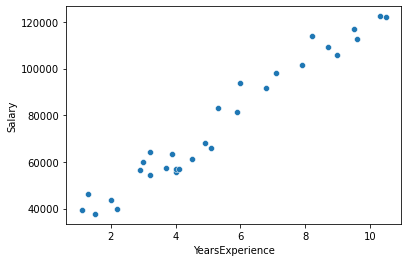

In [10]:
sns.scatterplot(x=salaries['YearsExperience'],y=salaries['Salary'])

In [11]:
sns.joinplot(x=salaries['YearsExperience'],y=salaries['Salary'])

AttributeError: module 'seaborn' has no attribute 'joinplot'

In [12]:
x=salaries.iloc[:,:-1].values
y=salaries.iloc[:,-1].values

In [13]:
print(x.shape)
print(y.shape)

(30, 1)
(30,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
?train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(20, 1) (10, 1) (20,) (10,)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg=LinearRegression()

In [25]:
reg.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=reg.predict(X_test)

In [28]:
prediction=pd.DataFrame({'actual':y_test, 'predicted':y_pred})
prediction

,actual,predicted
0,112635.0,115814.307562
1,67938.0,71511.925348
2,113812.0,102617.853286
3,83088.0,75282.340855
4,64445.0,55487.659440
5,57189.0,60200.678825
6,122391.0,122412.534701
7,109431.0,107330.872670
8,56957.0,63028.490456
9,39343.0,35692.978025


In [29]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.9549236946181227
0.9553063138044949


In [43]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(f'MSE = {mse:0.2f}')
rmse=np.sqrt(mse)
print(f'RMSE = {rmse:0.2f}')

MSE = 35301898.89
RMSE = 5941.54


In [32]:
print(reg.predict([[7.5]]))

[96019.62614731]


In [36]:
print(reg.predict([[15]]))

[166714.91691537]


In [55]:
print("slope", reg.coef_ ,"bais", reg.intercept_)

slope [9426.03876907] bais 25324.33537924433


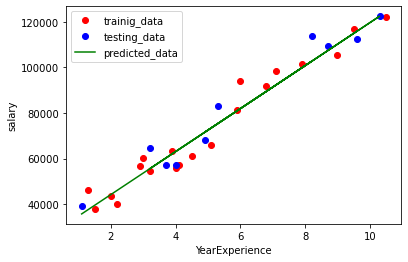

In [45]:
plt.plot(X_train,y_train,'ro',label='trainig_data')
plt.plot(X_test,y_test,'bo',label='testing_data')
plt.plot(X_test,y_pred,'g-',label='predicted_data')
plt.xlabel('YearExperience')
plt.ylabel('salary')
plt.legend()
plt.show()

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [61]:
df=pd.read_csv('cars_detail.csv')

In [62]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [63]:
df.shape

(8128, 13)

In [64]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [67]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [69]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [70]:
df.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [71]:
df.seller_type.value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [72]:
df.transmission.value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [73]:
df.seats.value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [74]:
df.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6585,Maruti Swift AMT ZXI,2018,600000,69779,Petrol,Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
3445,Maruti Ciaz VDi Plus,2015,625000,90000,Diesel,Individual,Manual,First Owner,26.21 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0


In [75]:
df['age']=2022-df['year']
df.drop('year',axis=1,inplace=True)

In [76]:
df.sample(5)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
3098,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,725000,45000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1498 CC,98.96 bhp,205Nm@ 1750-3250rpm,5.0,5
3234,Maruti Swift AMT ZDI,740000,38000,Diesel,Individual,Automatic,First Owner,28.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,3
7933,Maruti Alto 800 LXI,310000,54000,Petrol,Individual,Manual,First Owner,24.7 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,5
5307,Maruti Wagon R VXI Minor,250000,60000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0,12
3317,Maruti SX4 ZDI Leather,350000,115000,Diesel,Individual,Manual,Fourth & Above Owner,21.5 kmpl,1248 CC,88.8 bhp,200Nm@ 1750rpm,5.0,11


In [77]:
df.isnull().sum()

name               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
age                0
dtype: int64

In [78]:
df.dropna(inplace=True)

In [79]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,8
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,16
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,9
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,15
8125,Maruti Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,13
8126,Tata Indigo CR4,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,9


In [87]:
def splitnum(x):
    x=str(x)
    x=x.split(' ')[0]
    return float(x)

In [88]:
df.sample()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
695,Maruti Wagon R LXI Minor,135000,150000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0,13


In [89]:
df['mileage'] = df['mileage'].apply(splitnum)
df['engine'] = df['engine'].apply(splitnum)
df['max_power'] = df['max_power'].apply(splitnum)

In [91]:
df.sample(10)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
5398,Ford Figo 1.2P Ambiente MT,245000,25000,Petrol,Dealer,Manual,First Owner,18.16,1196.0,86.80,112Nm@ 4000rpm,5.0,11
2558,Chevrolet Spark 1.0 PS,125000,70000,Petrol,Individual,Manual,First Owner,16.00,995.0,63.00,90.3Nm@ 4200rpm,5.0,12
973,Hyundai Elantra CRDi SX,700000,120000,Diesel,Individual,Manual,First Owner,22.70,1582.0,126.24,259.87Nm@ 1900-2750rpm,5.0,9
1666,Maruti Ritz VDi,270000,89000,Diesel,Individual,Manual,Second Owner,21.10,1248.0,73.90,113Nm@ 4500rpm,5.0,11
7180,Honda Amaze S i-Dtech,440000,50000,Diesel,Individual,Manual,First Owner,25.80,1498.0,98.60,200Nm@ 1750rpm,5.0,7
3707,Chevrolet Beat LT,180000,60000,Petrol,Individual,Manual,First Owner,18.60,1199.0,79.40,108Nm@ 4400rpm,5.0,10
3778,Tata New Safari DICOR 2.2 VX 4x2,725000,90000,Diesel,Individual,Manual,First Owner,13.93,2179.0,138.00,320Nm@ 1700-2700rpm,7.0,10
5045,Ford EcoSport 1.5 TDCi Titanium BSIV,600000,50000,Diesel,Individual,Manual,First Owner,22.77,1498.0,98.59,205Nm@ 1750-3250rpm,5.0,7
4514,Maruti A-Star Lxi,235000,50000,Petrol,Individual,Manual,First Owner,19.00,998.0,66.10,90Nm@ 3500rpm,5.0,12
1207,Tata Zest Revotron 1.2 XT,325000,50000,Petrol,Individual,Manual,First Owner,17.57,1193.0,88.70,140Nm@ 1500-4000rpm,5.0,7


In [113]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
diesel =df.fuel[df['fuel']=='Diesel'].count()
petrol =df.fuel[df['fuel']=='petrol'].count()
lpg =df.fuel[df['fuel']=='LPG'].count()
cng =df.fuel[df['fuel']=='CNG'].count()
plt.pie([diesel , petrol , lpg ,cng], labels=['Diesel','petrol','LPG','CNG'])
plt.legend()


plt.subplot(2,2,2)
sns.barplot(x='transmission',y='selling_price',data=df)
plt.subplot(2,2,3)
sns.barplot(x='owner',y='selling_price',data=df)
plt.subplot(2,2,4)
sns.barplot(x='seller_type',y='selling_price',data=df)


ValueError: cannot convert float NaN to integer

posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1440x1080 with 1 Axes>

In [98]:
df.drop('torque',axis=1,inplace=True)

In [100]:
df.sample(5)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
4767,Maruti Ciaz Delta Automatic BSIV,1025000,15000,Petrol,Dealer,Automatic,First Owner,20.28,1462.0,103.25,5.0,3
2715,Maruti Alto 800 Base,185000,10300,Petrol,Individual,Manual,First Owner,22.74,796.0,47.30,5.0,8
163,Toyota Innova Crysta 2.8 ZX AT BSIV,1525000,42163,Diesel,Dealer,Automatic,Second Owner,11.36,2755.0,171.50,7.0,6
4352,Tata Sumo MKII Turbo 2.0 LX,150000,225000,Diesel,Individual,Manual,Third Owner,14.00,1948.0,90.00,9.0,12
2031,Maruti Ertiga 1.5 VDI,850000,59000,Diesel,Individual,Manual,First Owner,24.20,1498.0,93.87,7.0,4


In [101]:
from sklearn.preprocessing import LabelEncoder


In [110]:
encoder=LabelEncoder()
df.fuel=encoder.fit_transform(df.fuel)

df.seller_type=encoder.fit_transform(df.seller_type)

df.transmission=encoder.fit_transform(df.transmission)
df.seats=encoder.fit_transform(df.seats)
df.owner=encoder.fit_transform(df.owner)

In [111]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,0,23.40,1248.0,74.00,2,8
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,21.14,1498.0,103.52,2,8
2,Honda City 2017-2020 EXi,158000,140000,3,1,1,4,17.70,1497.0,78.00,2,16
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,0,23.00,1396.0,90.00,2,12
4,Maruti Swift VXI BSIII,130000,120000,3,1,1,0,16.10,1298.0,88.20,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,3,1,1,0,18.50,1197.0,82.85,2,9
8124,Hyundai Verna CRDi SX,135000,119000,1,1,1,1,16.80,1493.0,110.00,2,15
8125,Maruti Swift Dzire ZDi,382000,120000,1,1,1,0,19.30,1248.0,73.90,2,13
8126,Tata Indigo CR4,290000,25000,1,1,1,0,23.57,1396.0,70.00,2,9


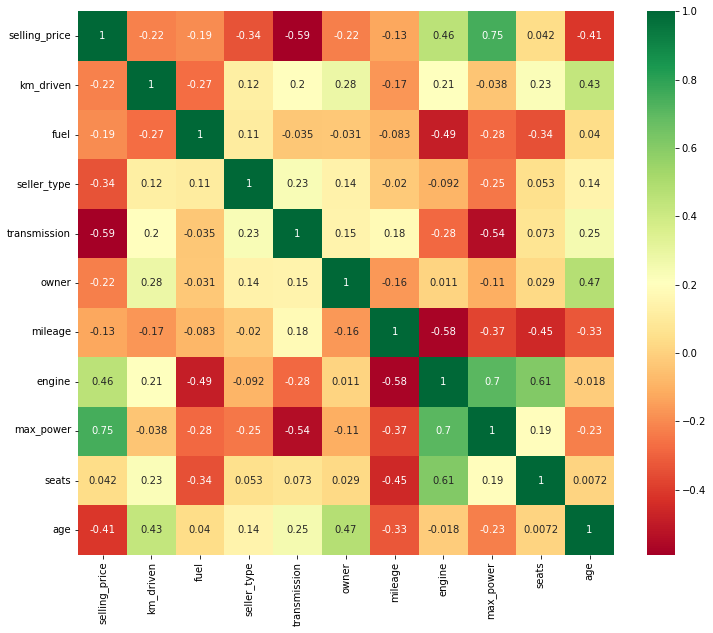

In [114]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True ,cmap='RdYlGn')
plt.show()

In [115]:
def getcarname(carname):
    carname=carname.split(' ')
    return f'{carname[0]}'
df.name=df.name.apply(getcarname)

In [116]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti,450000,145500,1,1,1,0,23.40,1248.0,74.00,2,8
1,Skoda,370000,120000,1,1,1,2,21.14,1498.0,103.52,2,8
2,Honda,158000,140000,3,1,1,4,17.70,1497.0,78.00,2,16
3,Hyundai,225000,127000,1,1,1,0,23.00,1396.0,90.00,2,12
4,Maruti,130000,120000,3,1,1,0,16.10,1298.0,88.20,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,320000,110000,3,1,1,0,18.50,1197.0,82.85,2,9
8124,Hyundai,135000,119000,1,1,1,1,16.80,1493.0,110.00,2,15
8125,Maruti,382000,120000,1,1,1,0,19.30,1248.0,73.90,2,13
8126,Tata,290000,25000,1,1,1,0,23.57,1396.0,70.00,2,9


In [117]:
dummies =pd.get_dummies(df.name)# بيدي كل عربيه منهم رقم يعرفها بيه
dummies.head()

,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,...,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df1=pd.concat([df,dummies],axis=1)

In [119]:
df1

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Maruti,450000,145500,1,1,1,0,23.40,1248.0,74.00,...,0,0,0,0,0,0,0,0,0,0
1,Skoda,370000,120000,1,1,1,2,21.14,1498.0,103.52,...,0,0,0,0,0,1,0,0,0,0
2,Honda,158000,140000,3,1,1,4,17.70,1497.0,78.00,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai,225000,127000,1,1,1,0,23.00,1396.0,90.00,...,0,0,0,0,0,0,0,0,0,0
4,Maruti,130000,120000,3,1,1,0,16.10,1298.0,88.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,320000,110000,3,1,1,0,18.50,1197.0,82.85,...,0,0,0,0,0,0,0,0,0,0
8124,Hyundai,135000,119000,1,1,1,1,16.80,1493.0,110.00,...,0,0,0,0,0,0,0,0,0,0
8125,Maruti,382000,120000,1,1,1,0,19.30,1248.0,73.90,...,0,0,0,0,0,0,0,0,0,0
8126,Tata,290000,25000,1,1,1,0,23.57,1396.0,70.00,...,0,0,0,0,0,0,1,0,0,0


In [120]:
df1.drop('name',axis=1,inplace=True)

In [121]:
df1.sample()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,...,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
7331,1800000,20000,1,0,0,0,11.36,2755.0,171.5,5,...,0,0,0,0,0,0,0,1,0,0


In [122]:
x=df1.iloc[:,0].values
y=df1.iloc[:,1:].values

In [141]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=20201)

In [143]:
print(Xtrain.shape,Xtest.shape,ytrain.shape, ytest.shape)

(5929,) (1977,) (5929, 41) (1977, 41)


In [144]:
print(x.shape)
print(y.shape)

(7906,)
(7906, 41)


In [146]:
Xtrain.shape

(5929,)

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
regg=LinearRegression()

In [147]:
regg.fit(Xtrain,ytrain)

ValueError: Expected 2D array, got 1D array instead:
array=[900000 625000 600000 ... 700000 450000 335000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [149]:
ypred=regg.predict(Xtest)
pred_df=pd.DataFrame({'ypred'}:k for k in ypred)
pred_df.T

SyntaxError: invalid syntax (2488457525.py, line 2)

In [ ]:
compare_price=pd.DataFrame({})